In [23]:
# 1.Work on this dataset ,bringing out all the useful insight and information
# 2.Build a model for this data set, The accuracy score should not be less than 96%

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [25]:
drug = pd.read_csv('drug200.csv')
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [26]:
drug['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [27]:
total = drug.isnull().sum().sort_values(ascending = False)
percent = (drug.isnull().sum()/drug.isnull().sum().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent],axis = 1, keys = ['TOTAL_MISSING','PERCENTAGE_RATE'])
missing_data

,TOTAL_MISSING,PERCENTAGE_RATE
Drug,0,0.0
Na_to_K,0,0.0
Cholesterol,0,0.0
BP,0,0.0
Sex,0,0.0
Age,0,0.0


In [28]:
drug.dropna(inplace=True)

In [29]:
drug['Cholesterol'].unique

<bound method Series.unique of 0        HIGH
1        HIGH
2        HIGH
3        HIGH
4        HIGH
        ...  
195      HIGH
196      HIGH
197      HIGH
198    NORMAL
199    NORMAL
Name: Cholesterol, Length: 200, dtype: object>

In [30]:
drug_variable = ['Sex','BP','Cholesterol','Drug']
enc = LabelEncoder()
for col in drug_variable:
    drug[col] = enc.fit_transform(drug[col])


In [31]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [32]:
drug.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


<AxesSubplot:>

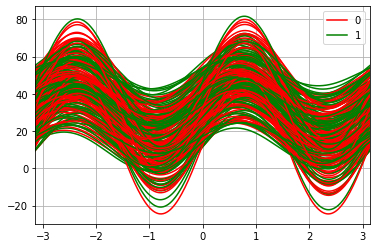

In [33]:
pd.plotting.andrews_curves(drug,'Sex', color =['red', 'green'])

In [34]:
x = drug.drop('Drug',axis = 1)
y = drug['Drug']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =  0.25,random_state=1)

In [36]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
pred1 = model1.predict(x_test)
pred1

array([4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 1, 1, 4, 4, 2, 0, 4, 4,
       4, 0, 2, 4, 4, 0, 4, 4, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 4,
       2, 0, 4, 4, 0, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      0.75      0.86         4
           4       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.99      0.95      0.97        50
weighted avg       0.98      0.98      0.98        50

AxesSubplot(0.125,0.125;0.62x0.755)


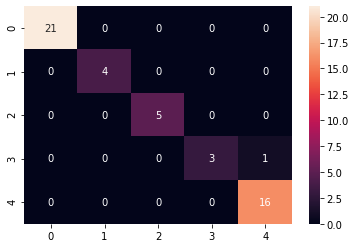

In [38]:
print(classification_report(y_test,pred1))
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt ='0.5g'))

In [39]:
print('MAE:',mean_absolute_error(y_test,pred1))
print('MSE:',mean_squared_error(y_test,pred1))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred1)))

MAE: 0.02
MSE: 0.02
RMSE: 0.1414213562373095


In [40]:
new  = {
    'original values':y_test,
    'predicted values': pred1
}
new_drug = pd.DataFrame(new)
new_drug

,original values,predicted values
58,4,4
40,0,0
34,4,4
102,3,3
184,0,0
198,4,4
95,4,4
4,0,0
29,0,0
168,0,0
